In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
file_path= "C:/Users/ASUS/Downloads/Coffee Shop Sales.xlsx - Transactions (2).csv"
df=pd.read_csv(file_path)
print(df)

        transaction_id transaction_date transaction_time  transaction_qty  \
0                    1         1/1/2023          7:06:11                2   
1                    2         1/1/2023          7:08:56                2   
2                    3         1/1/2023          7:14:04                2   
3                    4         1/1/2023          7:20:24                1   
4                    5         1/1/2023          7:22:41                2   
...                ...              ...              ...              ...   
149111          149452        6/30/2023         20:18:41                2   
149112          149453        6/30/2023         20:25:10                2   
149113          149454        6/30/2023         20:31:34                1   
149114          149455        6/30/2023         20:57:19                1   
149115          149456        6/30/2023         20:57:19                2   

        store_id   store_location  product_id  unit_price    product_catego

In [51]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [53]:
print(df.isnull())

        transaction_id  transaction_date  transaction_time  transaction_qty  \
0                False             False             False            False   
1                False             False             False            False   
2                False             False             False            False   
3                False             False             False            False   
4                False             False             False            False   
...                ...               ...               ...              ...   
149111           False             False             False            False   
149112           False             False             False            False   
149113           False             False             False            False   
149114           False             False             False            False   
149115           False             False             False            False   

        store_id  store_location  product_id  unit_

In [54]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [55]:
print(df.shape)

(149116, 11)


In [56]:
df.dropna(inplace=True)

In [57]:
print(df)

        transaction_id transaction_date transaction_time  transaction_qty  \
0                    1         1/1/2023          7:06:11                2   
1                    2         1/1/2023          7:08:56                2   
2                    3         1/1/2023          7:14:04                2   
3                    4         1/1/2023          7:20:24                1   
4                    5         1/1/2023          7:22:41                2   
...                ...              ...              ...              ...   
149111          149452        6/30/2023         20:18:41                2   
149112          149453        6/30/2023         20:25:10                2   
149113          149454        6/30/2023         20:31:34                1   
149114          149455        6/30/2023         20:57:19                1   
149115          149456        6/30/2023         20:57:19                2   

        store_id   store_location  product_id  unit_price    product_catego

In [58]:
print(df.columns)

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')


In [59]:
#To determine the total revenue generated by each store location over a specific period.

df['Total_Sales'] = df['unit_price'] * df['transaction_qty']
store_revenue = df.groupby('store_location')['Total_Sales'].sum()
print("Total Revenue per Store:\n", store_revenue)

Total Revenue per Store:
 store_location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: Total_Sales, dtype: float64


In [60]:
#To identify the top-selling products in each store location.

top_products = df.groupby(['store_location', 'product_detail'])['transaction_qty'].sum().reset_index()
top_products = top_products.sort_values(['store_location', 'transaction_qty'], ascending=[True, False])
print("Top-Selling Products per Store:\n", top_products)

Top-Selling Products per Store:
       store_location                product_detail  transaction_qty
20           Astoria             Dark chocolate Lg             1755
24           Astoria                  Earl Grey Rg             1725
63           Astoria                 Peppermint Rg             1673
70           Astoria      Spicy Eye Opener Chai Lg             1634
33           Astoria                   Ethiopia Sm             1619
..               ...                           ...              ...
172  Lower Manhattan        Columbian Medium Roast               37
221  Lower Manhattan                    Peppermint               37
195  Lower Manhattan  Guatemalan Sustainably Grown               35
224  Lower Manhattan          Primo Espresso Roast               31
208  Lower Manhattan                   Lemon Grass               30

[239 rows x 3 columns]


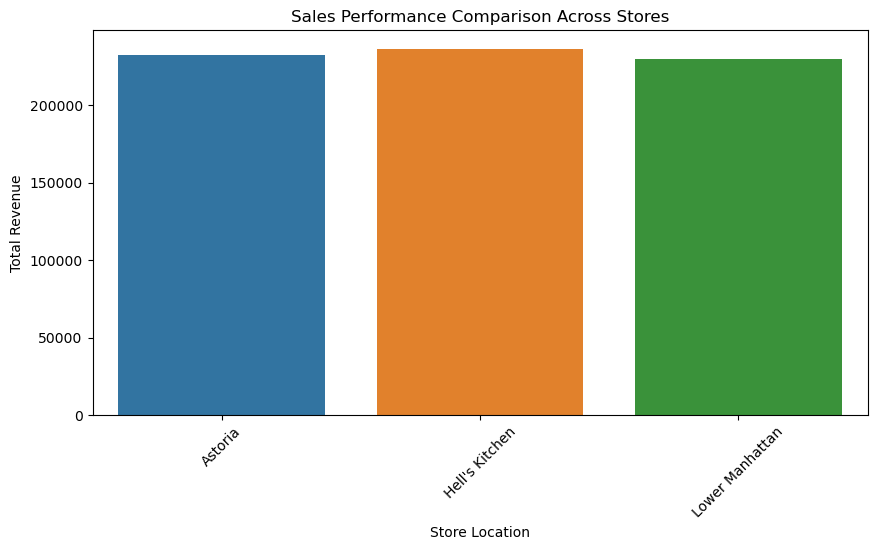

In [61]:
#To compare the sales performance of different store locations.

import matplotlib.pyplot as plt
import seaborn as sns

store_revenue = df.groupby('store_location')['Total_Sales'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=store_revenue.index, y=store_revenue.values)
plt.xlabel("Store Location")
plt.ylabel("Total Revenue")
plt.title("Sales Performance Comparison Across Stores")
plt.xticks(rotation=45)
plt.show()

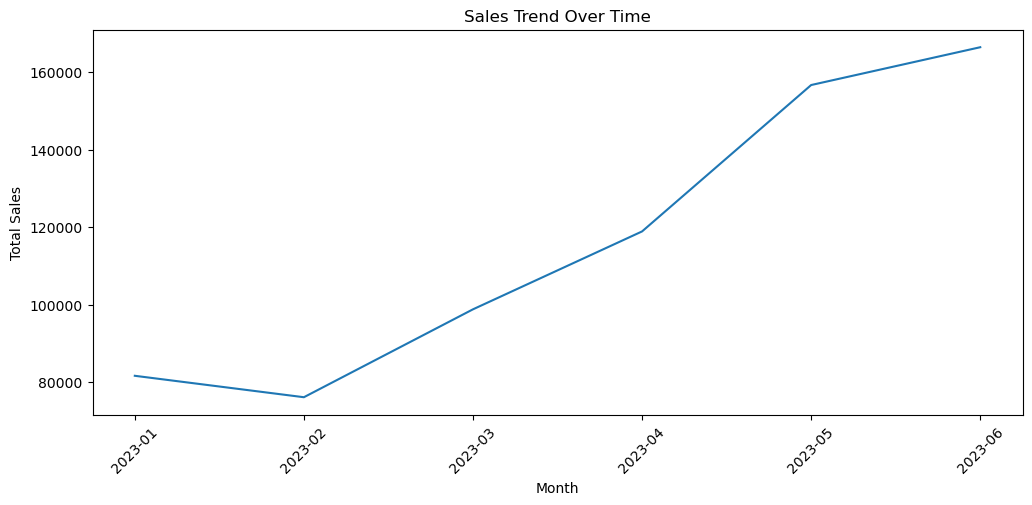

In [62]:
#To analyze the purchasing patterns of customers over time.

df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['Month'] = df['transaction_date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total_Sales'].sum()
plt.figure(figsize=(12,5))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.show()


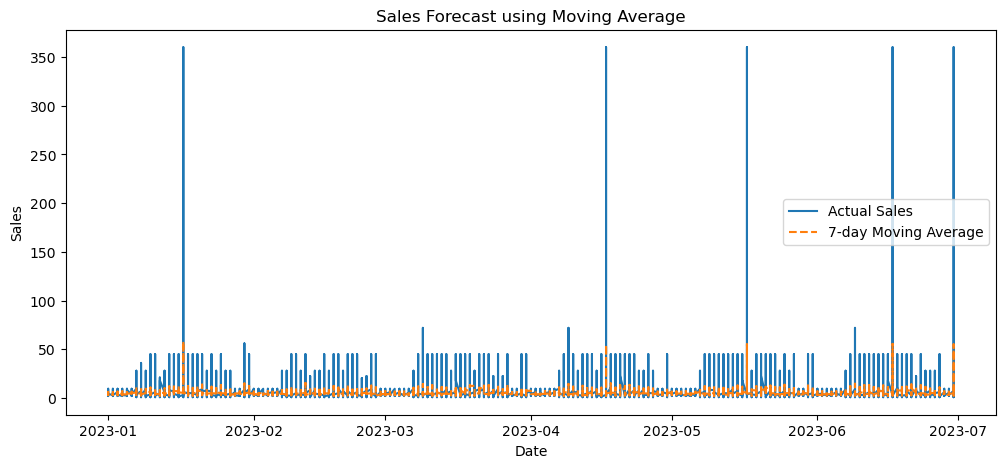

In [63]:
#To predict future demand for specific products based on historical sales data.

df['Sales_MA'] = df['Total_Sales'].rolling(window=7).mean()
plt.figure(figsize=(12,5))
plt.plot(df['transaction_date'], df['Total_Sales'], label='Actual Sales')
plt.plot(df['transaction_date'], df['Sales_MA'], label='7-day Moving Average', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast using Moving Average")
plt.legend()
plt.show()

In [64]:
#To determine the average transaction value for each store.

avg_transaction_value = df.groupby('store_location')['Total_Sales'].mean()
print("Average Transaction Value per Store:\n", avg_transaction_value)

Average Transaction Value per Store:
 store_location
Astoria            4.589891
Hell's Kitchen     4.661696
Lower Manhattan    4.814726
Name: Total_Sales, dtype: float64


In [65]:
#To identify the peak sales hours and days of the week.

df['Hour'] = df['transaction_date'].dt.hour
df['Day_of_Week'] = df['transaction_date'].dt.day_name()
peak_hours = df.groupby('Hour')['Total_Sales'].sum()
peak_days = df.groupby('Day_of_Week')['Total_Sales'].sum()
print("Peak Hours:\n", peak_hours);
print("\nPeak Days:\n", peak_days);

Peak Hours:
 Hour
0    698812.33
Name: Total_Sales, dtype: float64

Peak Days:
 Day_of_Week
Friday       101373.00
Monday       101677.28
Saturday      96894.48
Sunday        98330.31
Thursday     100767.78
Tuesday       99455.94
Wednesday    100313.54
Name: Total_Sales, dtype: float64


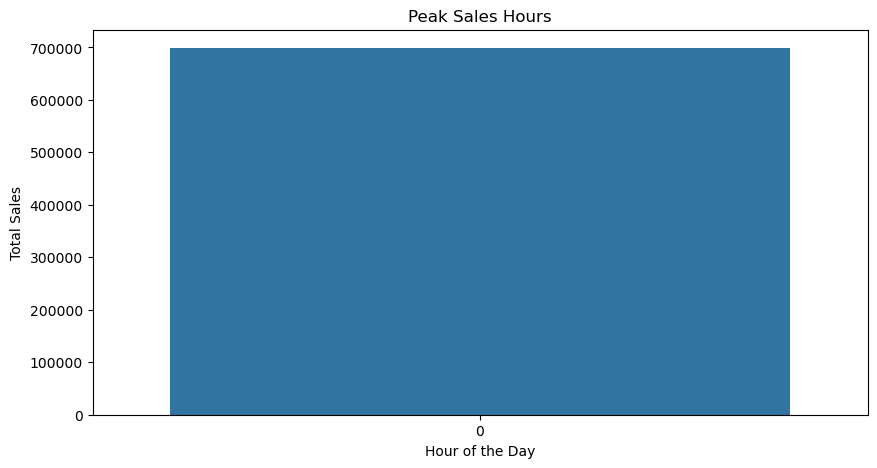

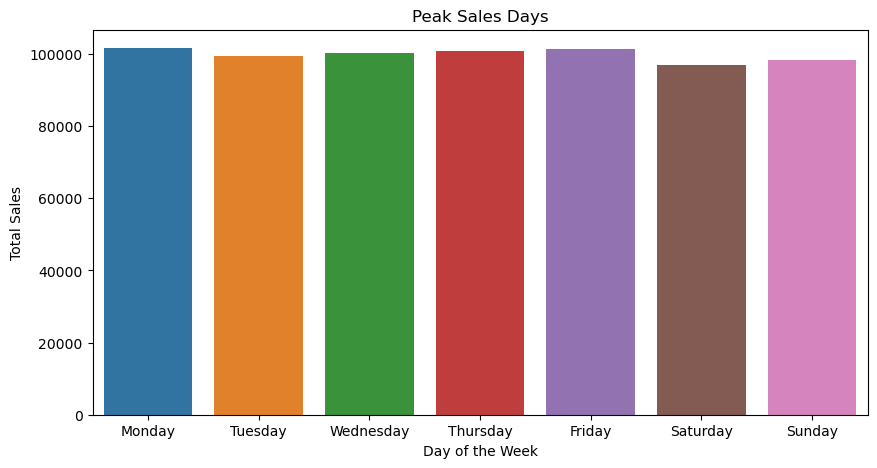

In [66]:
#To identify the peak sales hours and days of the week.

df['Hour'] = df['transaction_date'].dt.hour
df['Day_of_Week'] = df['transaction_date'].dt.day_name()
peak_hours = df.groupby('Hour')['Total_Sales'].sum()
peak_days = df.groupby('Day_of_Week')['Total_Sales'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=peak_hours.index, y=peak_hours.values)
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.title("Peak Sales Hours")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=peak_days.index, y=peak_days.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.title("Peak Sales Days")
plt.show()

In [67]:
#To determine the average number of items purchased per transaction.

avg_items_per_transaction = df.groupby('store_location')['transaction_qty'].mean()
print("Average Items per Transaction per Store:\n", avg_items_per_transaction)

Average Items per Transaction per Store:
 store_location
Astoria            1.403012
Hell's Kitchen     1.413955
Lower Manhattan    1.501444
Name: transaction_qty, dtype: float64
